In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, accuracy_score, classification_report, f1_score, recall_score,precision_score
import pickle
from collections import defaultdict

In [5]:
def read_results(folder, cycle,psuedo_label=False):
    base_path = '/Volumes/data01/waitsun/result_data_analysis'
    true_label = np.load(f'{base_path}/{folder}/{folder}_{cycle}_truth_label.npy')
    pred_label = np.load(f'{base_path}/{folder}/{folder}_{cycle}_prediction_label.npy')


    return [true_label, pred_label]

def get_results(rnd_ids):
    random_results_per_id = []
    for rnd_id in rnd_ids:
        random_results = {'true_label':[],'pred_label':[],'scores_label':[],'labeled_indices':[]}
        for i in range(10):
            results = read_results(f'SnapshotSerengetiSmall_mobyv2al_{rnd_id}',cycle=i)
            random_results['true_label'].append(results[0])
            random_results['pred_label'].append(results[1])


        random_results_per_id.append(random_results)
    return random_results_per_id

In [26]:
data_dict = {
    'rnd_ids': [20240618, 20240619, 20240704],
    # 'all_ids': [20240707],
    'lbs_ids': [20240624, 20240621, 20240611],
    'coreset_ids': [20240620, 20240623, 20240615],
    'corelbpseudo_ids': [20240706, 20240708, 20240722, 20240711],
    'corelb_ids': [20240622, 20240610, 20240629],
    'coreset_adv_sampling_ids': [20240702,20240739,20240740],
    'label_dispersion_adv_sampling_ids': [20240701],
    'coreset_full_epochs_ids': [20240730,20240731], #20240726
    'coreset_full_aug_epochs':[20240732,20240736,20240737]
}

lut = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_category_lut_adapted.df')

In [30]:
rnd_results_per_id = get_results(data_dict['rnd_ids'])
# classification_report(rnd_results_per_id[0], rnd_results_per_id[1])

In [31]:
for i in range(len(rnd_results_per_id)):
    x = classification_report(rnd_results_per_id[i]['true_label'][0], rnd_results_per_id[i]['pred_label'][0],output_dict=True)
    
    break

print(x)
support = []
for i in x:
    try:
        int(i)
        support.append((int(i),x[i]['support']))
    except ValueError:
        pass



/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'precision': 0.35902806870548803, 'recall': 0.09606546351305907, 'f1-score': 0.1515741068270251, 'support': 8921}, '1': {'precision': 0.1960931630353118, 'recall': 0.3137019230769231, 'f1-score': 0.24133148404993066, 'support': 832}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 415}, '3': {'precision': 0.9056526665799788, 'recall': 0.9177223529411764, 'f1-score': 0.9116475625946633, 'support': 53125}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 128}, '5': {'precision': 0.796116187277842, 'recall': 0.9041097586646689, 'f1-score': 0.846683248972303, 'support': 80759}, '6': {'precision': 0.35995085995085996, 'recall': 0.09482200647249191, 'f1-score': 0.15010245901639344, 'support': 3090}, '7': {'precision': 0.3363881401617251, 'recall': 0.4053922364788046, 'f1-score': 0.3676806363703322, 'support': 6157}, '8': {'precision': 0.2337262942080984, 'recall': 0.35514018691588783, 'f1-score': 0.2819165378670788, 'support': 1284}, '9': {'precisi

/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
support = sorted(support,key=lambda x: x[1],reverse=True)
support_sorted_class = [x[0] for x in support]

In [259]:
for i in range(len(rnd_results_per_id)):
    x = classification_report(rnd_results_per_id[i]['true_label'][0], rnd_results_per_id[i]['pred_label'][0],output_dict=False)
print(x)

/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.30      0.13      0.18      8921
           1       0.21      0.35      0.26       832
           2       0.00      0.00      0.00       415
           3       0.91      0.91      0.91     53125
           4       0.00      0.00      0.00       128
           5       0.82      0.86      0.84     80759
           6       0.43      0.14      0.21      3090
           7       0.30      0.32      0.31      6157
           8       0.21      0.31      0.25      1284
           9       0.32      0.32      0.32      5424
          10       0.00      0.00      0.00       145
          11       0.86      0.66      0.75      4686
          12       0.00      0.00      0.00       306
          13       0.26      0.13      0.17     13087
          14       0.63      0.29      0.40     22670
          15       0.71      0.69      0.70     16293
          16       0.75      0.92      0.83    134271
          17       0.00    

/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
data_dict

{'rnd_ids': [20240618, 20240619, 20240704],
 'lbs_ids': [20240624, 20240621, 20240611],
 'coreset_ids': [20240620, 20240623, 20240615],
 'corelbpseudo_ids': [20240706, 20240708, 20240722, 20240711],
 'corelb_ids': [20240622, 20240610, 20240629],
 'coreset_adv_sampling_ids': [20240702, 20240739, 20240740],
 'label_dispersion_adv_sampling_ids': [20240701],
 'coreset_full_epochs_ids': [20240730, 20240731],
 'coreset_full_aug_epochs': [20240732, 20240736, 20240737]}

In [35]:
# create weighted avg
results = defaultdict(dict)
results = defaultdict(lambda:defaultdict(dict))
sampling_names = ['random','label_dispersion','coreset','corelbpseudo','corelb','coreset_adv_sampling','label_dispersion_adv_sampling','coreset_full_epochs']
for n in sampling_names:
    for i in ['weighted avg f1','macro avg f1','accuracy']:
            for j in ['avg','std']:
                results[n][i][j] = None

def get_classification_report(rnd_results_per_id):
    weighted_f1 = defaultdict(list)
    macro_f1 = defaultdict(list)
    acc = defaultdict(list)

    for i in range(len(rnd_results_per_id)):    
        for j in range(10):
            tmp = classification_report(rnd_results_per_id[i]['true_label'][j], rnd_results_per_id[i]['pred_label'][j],output_dict=True)
            weighted_f1[i].append(tmp['weighted avg']['f1-score'])
            macro_f1[i].append(tmp['macro avg']['f1-score'])
            acc[i].append(tmp['accuracy'])

    w_f1_avg = np.mean([weighted_f1[i] for i in weighted_f1], axis=0).tolist()
    w_f1_std = np.std([weighted_f1[i] for i in weighted_f1], axis=0).tolist()
    m_f1_avg = np.mean([macro_f1[i] for i in macro_f1], axis=0).tolist()
    m_f1_std = np.std([macro_f1[i] for i in macro_f1], axis=0).tolist()
    acc_avg = np.mean([acc[i] for i in acc], axis=0).tolist()
    acc_std = np.std([acc[i] for i in acc], axis=0).tolist()

    return w_f1_avg, w_f1_std, m_f1_avg, m_f1_std, acc_avg, acc_std

for k,v in zip(sampling_names,data_dict.values()):
    tmp_results_id = get_results(v)
    clf_reports = get_classification_report(tmp_results_id)
    results[k]['weighted avg f1']['avg'] = clf_reports[0]
    results[k]['weighted avg f1']['std'] = clf_reports[1]
    results[k]['macro avg f1']['avg'] = clf_reports[2]
    results[k]['macro avg f1']['std'] = clf_reports[3]
    results[k]['accuracy']['avg'] = clf_reports[4]
    results[k]['accuracy']['std'] = clf_reports[5]


# fig, ax = plt.subplots(figsize=(8,5))

# create micro avg
# create macro avg
# create f1 score
# create support




/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

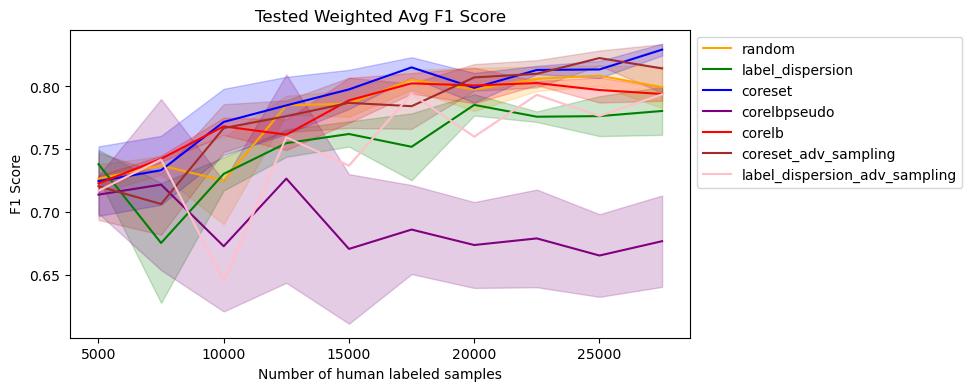

In [19]:
#Weighted-averaged: each classes’s contribution to the average is weighted by its size
color = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']
sampling_strat = ['coreset','random','label_dispersion','corelb','corelbpseudo','coreset_adv_sampling','label_dispersion_adv_sampling','coreset_full_epochs','coreset_full_aug_epochs']
color_map = dict(zip(sampling_strat, color))
fig, ax = plt.subplots(figsize=(8,4))
x = [5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500]
for i in results:
    if i == 'coreset_full_epochs':
        continue
    ax.plot(x,results[i]['weighted avg f1']['avg'], label=i,color=color_map[i])
    ax.fill_between(x, np.array(results[i]['weighted avg f1']['avg']) - np.array(results[i]['weighted avg f1']['std']), np.array(results[i]['weighted avg f1']['avg']) + np.array(results[i]['weighted avg f1']['std']), alpha=0.2, color=color_map[i])
ax.set_title('Tested Weighted Avg F1 Score')
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
ax.set_xlabel('Number of human labeled samples')
ax.set_ylabel('F1 Score')
plt.savefig(f'plots/weighted_avg_f1_score.png',bbox_inches='tight')

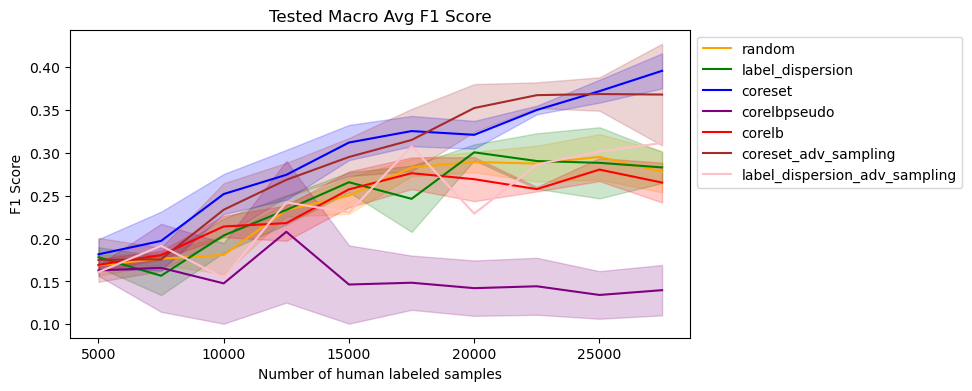

In [25]:
# Macro-averaged: all classes equally contribute to the final averaged metric
fig, ax = plt.subplots(figsize=(8,4))
x = [5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500]
for i in results:
    if i == 'coreset_full_epochs':
        continue
    ax.plot(x,results[i]['macro avg f1']['avg'], label=i,color=color_map[i])
    ax.fill_between(x, np.array(results[i]['macro avg f1']['avg']) - np.array(results[i]['macro avg f1']['std']), np.array(results[i]['macro avg f1']['avg']) + np.array(results[i]['macro avg f1']['std']), alpha=0.2,color=color_map[i])
ax.set_title('Tested Macro Avg F1 Score')
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
ax.set_xlabel('Number of human labeled samples')
ax.set_ylabel('F1 Score')
plt.savefig(f'plots/macro_avg_f1_score.png',bbox_inches='tight')

Text(0.5, 1.0, 'Accuracy Score')

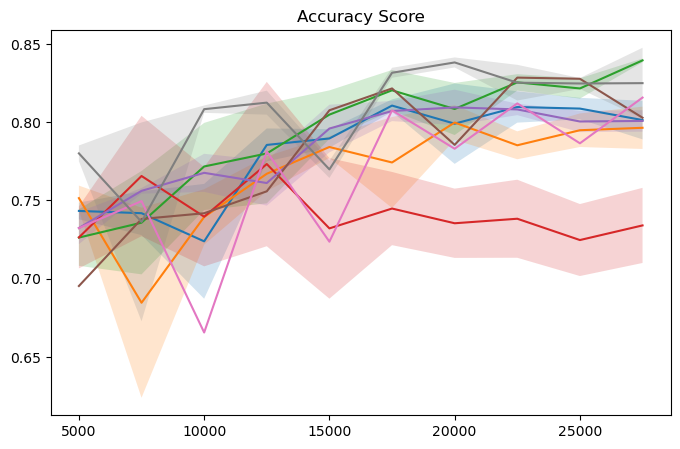

In [343]:
fig, ax = plt.subplots(figsize=(8,5))
x = [5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500]
for i in results:
    ax.plot(x,results[i]['accuracy']['avg'], label=i)
    ax.fill_between(x, np.array(results[i]['accuracy']['avg']) - np.array(results[i]['accuracy']['std']), np.array(results[i]['accuracy']['avg']) + np.array(results[i]['accuracy']['std']), alpha=0.2)
ax.set_title('Accuracy Score')

In [37]:
results

defaultdict(<function __main__.<lambda>()>,
            {'random': defaultdict(dict,
                         {'weighted avg f1': {'avg': [0.7266832527148076,
                            0.7371676938600801,
                            0.7251342257000771,
                            0.7849632175612168,
                            0.7863703760466246,
                            0.8053935010762441,
                            0.7975812186274203,
                            0.8060282755414238,
                            0.8085836208436454,
                            0.7994252374618149],
                           'std': [0.011347740964787844,
                            0.007370736057768433,
                            0.034666320747624484,
                            0.007589664363240677,
                            0.010418359997043308,
                            0.008066777008289911,
                            0.01713951315615969,
                            0.009698614207573378,
  

In [ ]:
# Macro-averaged: all classes equally contribute to the final averaged metric
fig, ax = plt.subplots(figsize=(8,4))
x = [5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000, 27500]
for i in results:
    print(i)
    if i == 'coreset_full_epochs':
        continue
    ax.plot(x,results[i]['precision avg f1']['avg'], label=i,color=color_map[i])
    ax.fill_between(x, np.array(results[i]['precision avg f1']['avg']) - np.array(results[i]['precision avg f1']['std']), np.array(results[i]['precision avg f1']['avg']) + np.array(results[i]['macro avg f1']['std']), alpha=0.2,color=color_map[i])
ax.set_title('Tested Macro Avg F1 Score')
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
ax.set_xlabel('Number of human labeled samples')
ax.set_ylabel('F1 Score')
plt.savefig(f'plots/macro_avg_f1_score.png',bbox_inches='tight')

In [22]:
def get_classification_report_per_class(rnd_results_per_id):
    # species_f1 = defaultdict(lambda:defaultdict(list))
    species_f1 = [[ [] for _ in range(46)] for _ in range(len(rnd_results_per_id))]

    for i in range(len(rnd_results_per_id)):    
        for j in range(10):
            tmp = classification_report(rnd_results_per_id[i]['true_label'][j], rnd_results_per_id[i]['pred_label'][j],output_dict=True)
            for k in range(46):    
               species_f1[i][k].append(tmp[str(k)]['f1-score'])            

    mean = np.mean(species_f1,axis=0)
    std = np.std(species_f1,axis=0)

    return mean,std


f1_per_class = defaultdict(dict)
for k,v in zip(sampling_names,data_dict.values()):
    tmp_results_id = get_results(v)
    clf_reports = get_classification_report_per_class(tmp_results_id)
    f1_per_class[k] = {'mean':clf_reports[0],'std':clf_reports[1]}



/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waitsun/miniforge3/envs/al-project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Text(0.5, 1.0, 'F1 Score per class')

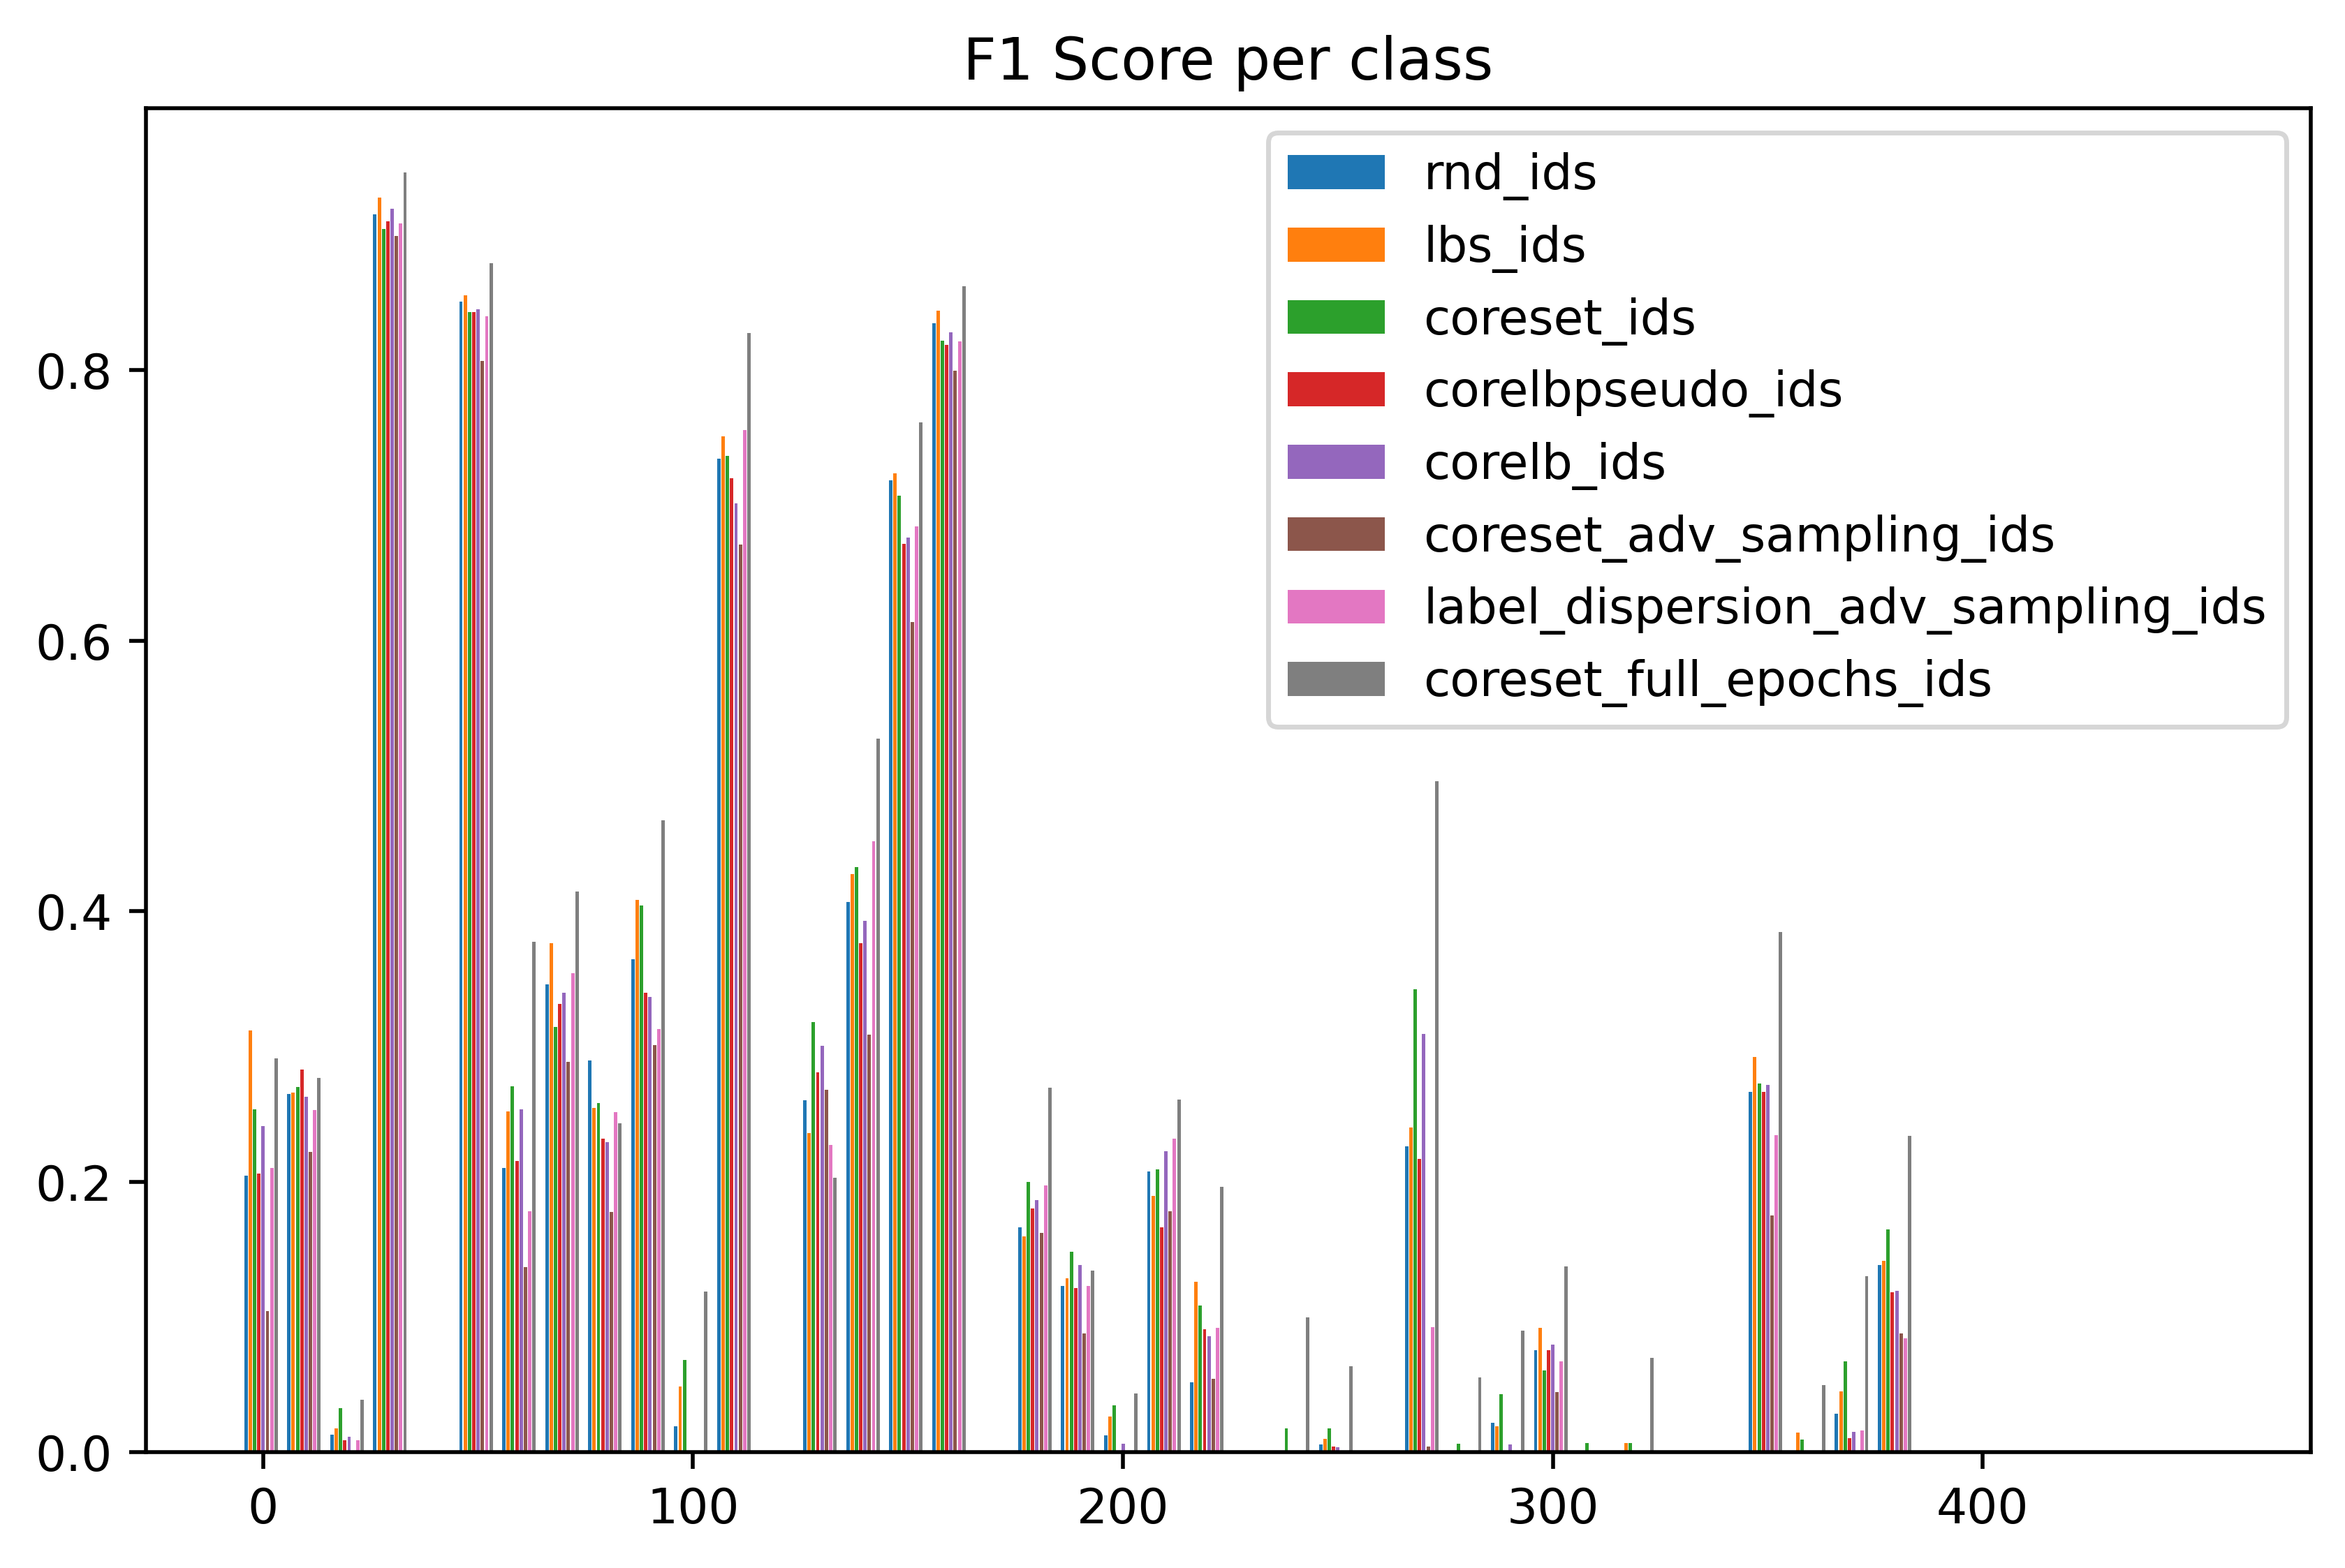

In [214]:
fig, ax = plt.subplots(figsize=(8,5),dpi=500)
x = np.arange(0,46*10,10)
eps = np.arange(-4,4,1)
t = 0 # targetslice
for i,(k,v) in enumerate(f1_per_class.items()):
    ax.bar(x+eps[i],v['mean'][:,t], label=k)

ax.legend()
ax.set
ax.set_title('F1 Score per class')

In [47]:
support_sorted_class

[16,
 5,
 3,
 14,
 15,
 13,
 0,
 7,
 9,
 11,
 6,
 19,
 35,
 21,
 38,
 27,
 8,
 1,
 37,
 22,
 20,
 18,
 30,
 2,
 25,
 12,
 29,
 34,
 32,
 36,
 10,
 4,
 28,
 31,
 17,
 26,
 39,
 33,
 44,
 45,
 40,
 24,
 23,
 42,
 43,
 41]

In [412]:
f1_per_class

defaultdict(dict,
            {'random': {'mean': array([[0.20467273, 0.32894361, 0.32053605, 0.4164583 , 0.44970218,
                      0.47812991, 0.47711164, 0.47878027, 0.46815915, 0.48395963],
                     [0.26508681, 0.26519079, 0.27847855, 0.33102938, 0.36089136,
                      0.43043495, 0.43807983, 0.4199588 , 0.4122821 , 0.43658582],
                     [0.01290323, 0.02370135, 0.05510075, 0.05397439, 0.11864724,
                      0.16205508, 0.14022932, 0.14238243, 0.14467886, 0.13589943],
                     [0.91528789, 0.92169719, 0.91822966, 0.94393783, 0.94634442,
                      0.95178888, 0.95636576, 0.95597089, 0.95311501, 0.95688812],
                     [0.        , 0.        , 0.        , 0.        , 0.08219178,
                      0.18593781, 0.25348628, 0.22920298, 0.26351947, 0.14814815],
                     [0.85092763, 0.8432007 , 0.8302035 , 0.87461   , 0.88189582,
                      0.89950963, 0.89556695, 0.89413539,

/var/folders/5f/83w09gxd6pq0h169x9168wcw0000gn/T/ipykernel_67973/3742785739.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation=90)
/var/folders/5f/83w09gxd6pq0h169x9168wcw0000gn/T/ipykernel_67973/3742785739.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation=90)


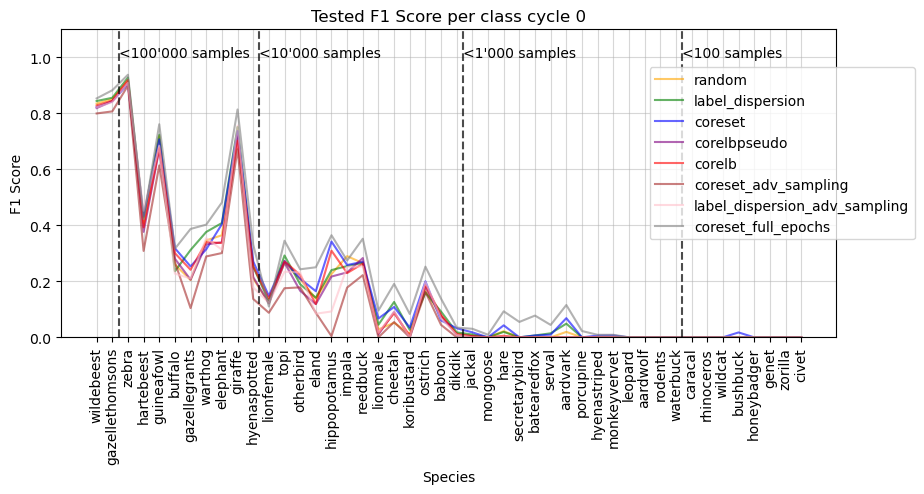

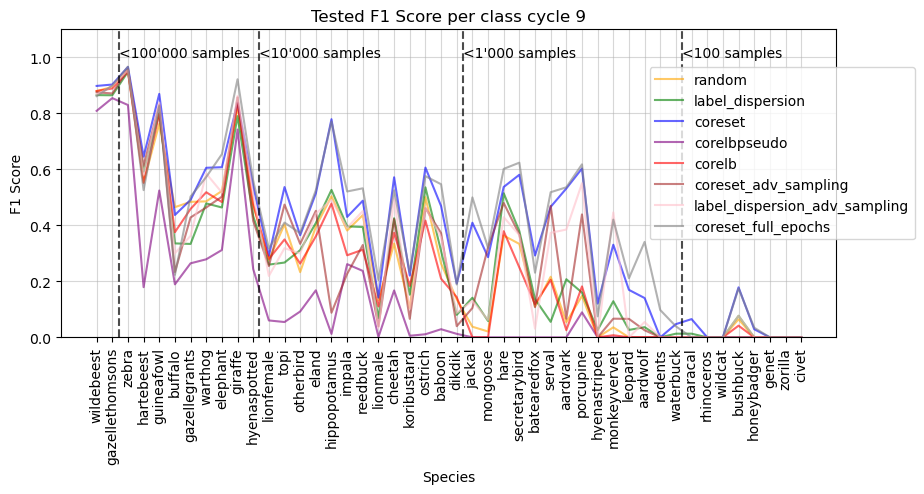

In [435]:
for  t in range(10):
    if t not in [0,9]:
        continue
    fig, ax = plt.subplots(figsize=(10,4))
    x = np.arange(0,46*10,10)
    eps = np.arange(-4,4,1)
    # t = 0 # targetslice
    x = lut.name.values[support_sorted_class]
    lut = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_category_lut_adapted.df')

    for i,(k,v) in enumerate(f1_per_class.items()):
        # if  i in ['coreset_full_epochs_ids','coreset_ids']:
        #     continue
        ax.plot(x,v['mean'][support_sorted_class,t], label=k,color=color_map[k],alpha=0.6)
    
    thr = [1.4,10.4,23.4,37.4]
    thr_txt = ['<100\'000 samples', '<10\'000 samples', '<1\'000 samples', '<100 samples']
    for i,j in (zip(thr,thr_txt)):
        ax.axvline(x=i, color='black', linestyle='--',alpha=0.7)
        ax.text (i, 1, j, rotation = 0)

    ax.legend(loc='upper left',bbox_to_anchor=(0.75,0.9))
    ax.set_xticklabels(x,rotation=90)
    ax.grid(alpha=0.5)
    ax.set_title(f'Tested F1 Score per class cycle {t}')
    ax.set_ylabel('F1 Score')
    ax.set_xlabel('Species')
    ax.set_ylim(0,1.1)
    # plt.savefig(f'plots/f1_per_class_{t}.png',bbox_inches='tight')

[defaultdict(list,
             {0: [0.29115537848605577],
              1: [0.2766116941529235],
              2: [0.038659793814432984],
              3: [0.9462958952096655],
              4: [0.0],
              5: [0.8791346925093677],
              6: [0.3773115220483641],
              7: [0.41462596444146255],
              8: [0.24320605435156517],
              9: [0.4675761539899085],
              10: [0.11891891891891893],
              11: [0.8278214138073584],
              12: [0.0],
              13: [0.20297904569553143],
              14: [0.5279067068925505],
              15: [0.7616639697950378],
              16: [0.8623894339362381],
              17: [0.0],
              18: [0.2693877551020408],
              19: [0.13442460317460317],
              20: [0.043726235741444866],
              21: [0.26101261195393893],
              22: [0.19652305366591083],
              23: [0.0],
              24: [0.1],
              25: [0.06356968215158924],
             

# confusion matrix

In [8]:
path = '/Volumes/data01/waitsun/result_data_analysis/SnapshotSerengetiSmall_mobyv2al_20240722'
truth_label = np.load('/Volumes/data01/waitsun/result_data_analysis/SnapshotSerengetiSmall_mobyv2al_20240722/SnapshotSerengetiSmall_mobyv2al_20240722_9_truth_label.npy')
prediction_label = np.load('/Volumes/data01/waitsun/result_data_analysis/SnapshotSerengetiSmall_mobyv2al_20240722/SnapshotSerengetiSmall_mobyv2al_20240722_9_prediction_label.npy')

array([[129513,   2808,    407, ...,      0,      0,      0],
       [  1811,  76415,    133, ...,      0,      0,      0],
       [  2050,    363,  50527, ...,      0,      0,      0],
       ...,
       [     7,      0,      3, ...,      0,      0,      0],
       [    10,      2,      0, ...,      0,      0,      0],
       [     6,      1,      1, ...,      0,      0,      0]])

In [10]:
import seaborn as sns
from matplotlib.colors import LogNorm

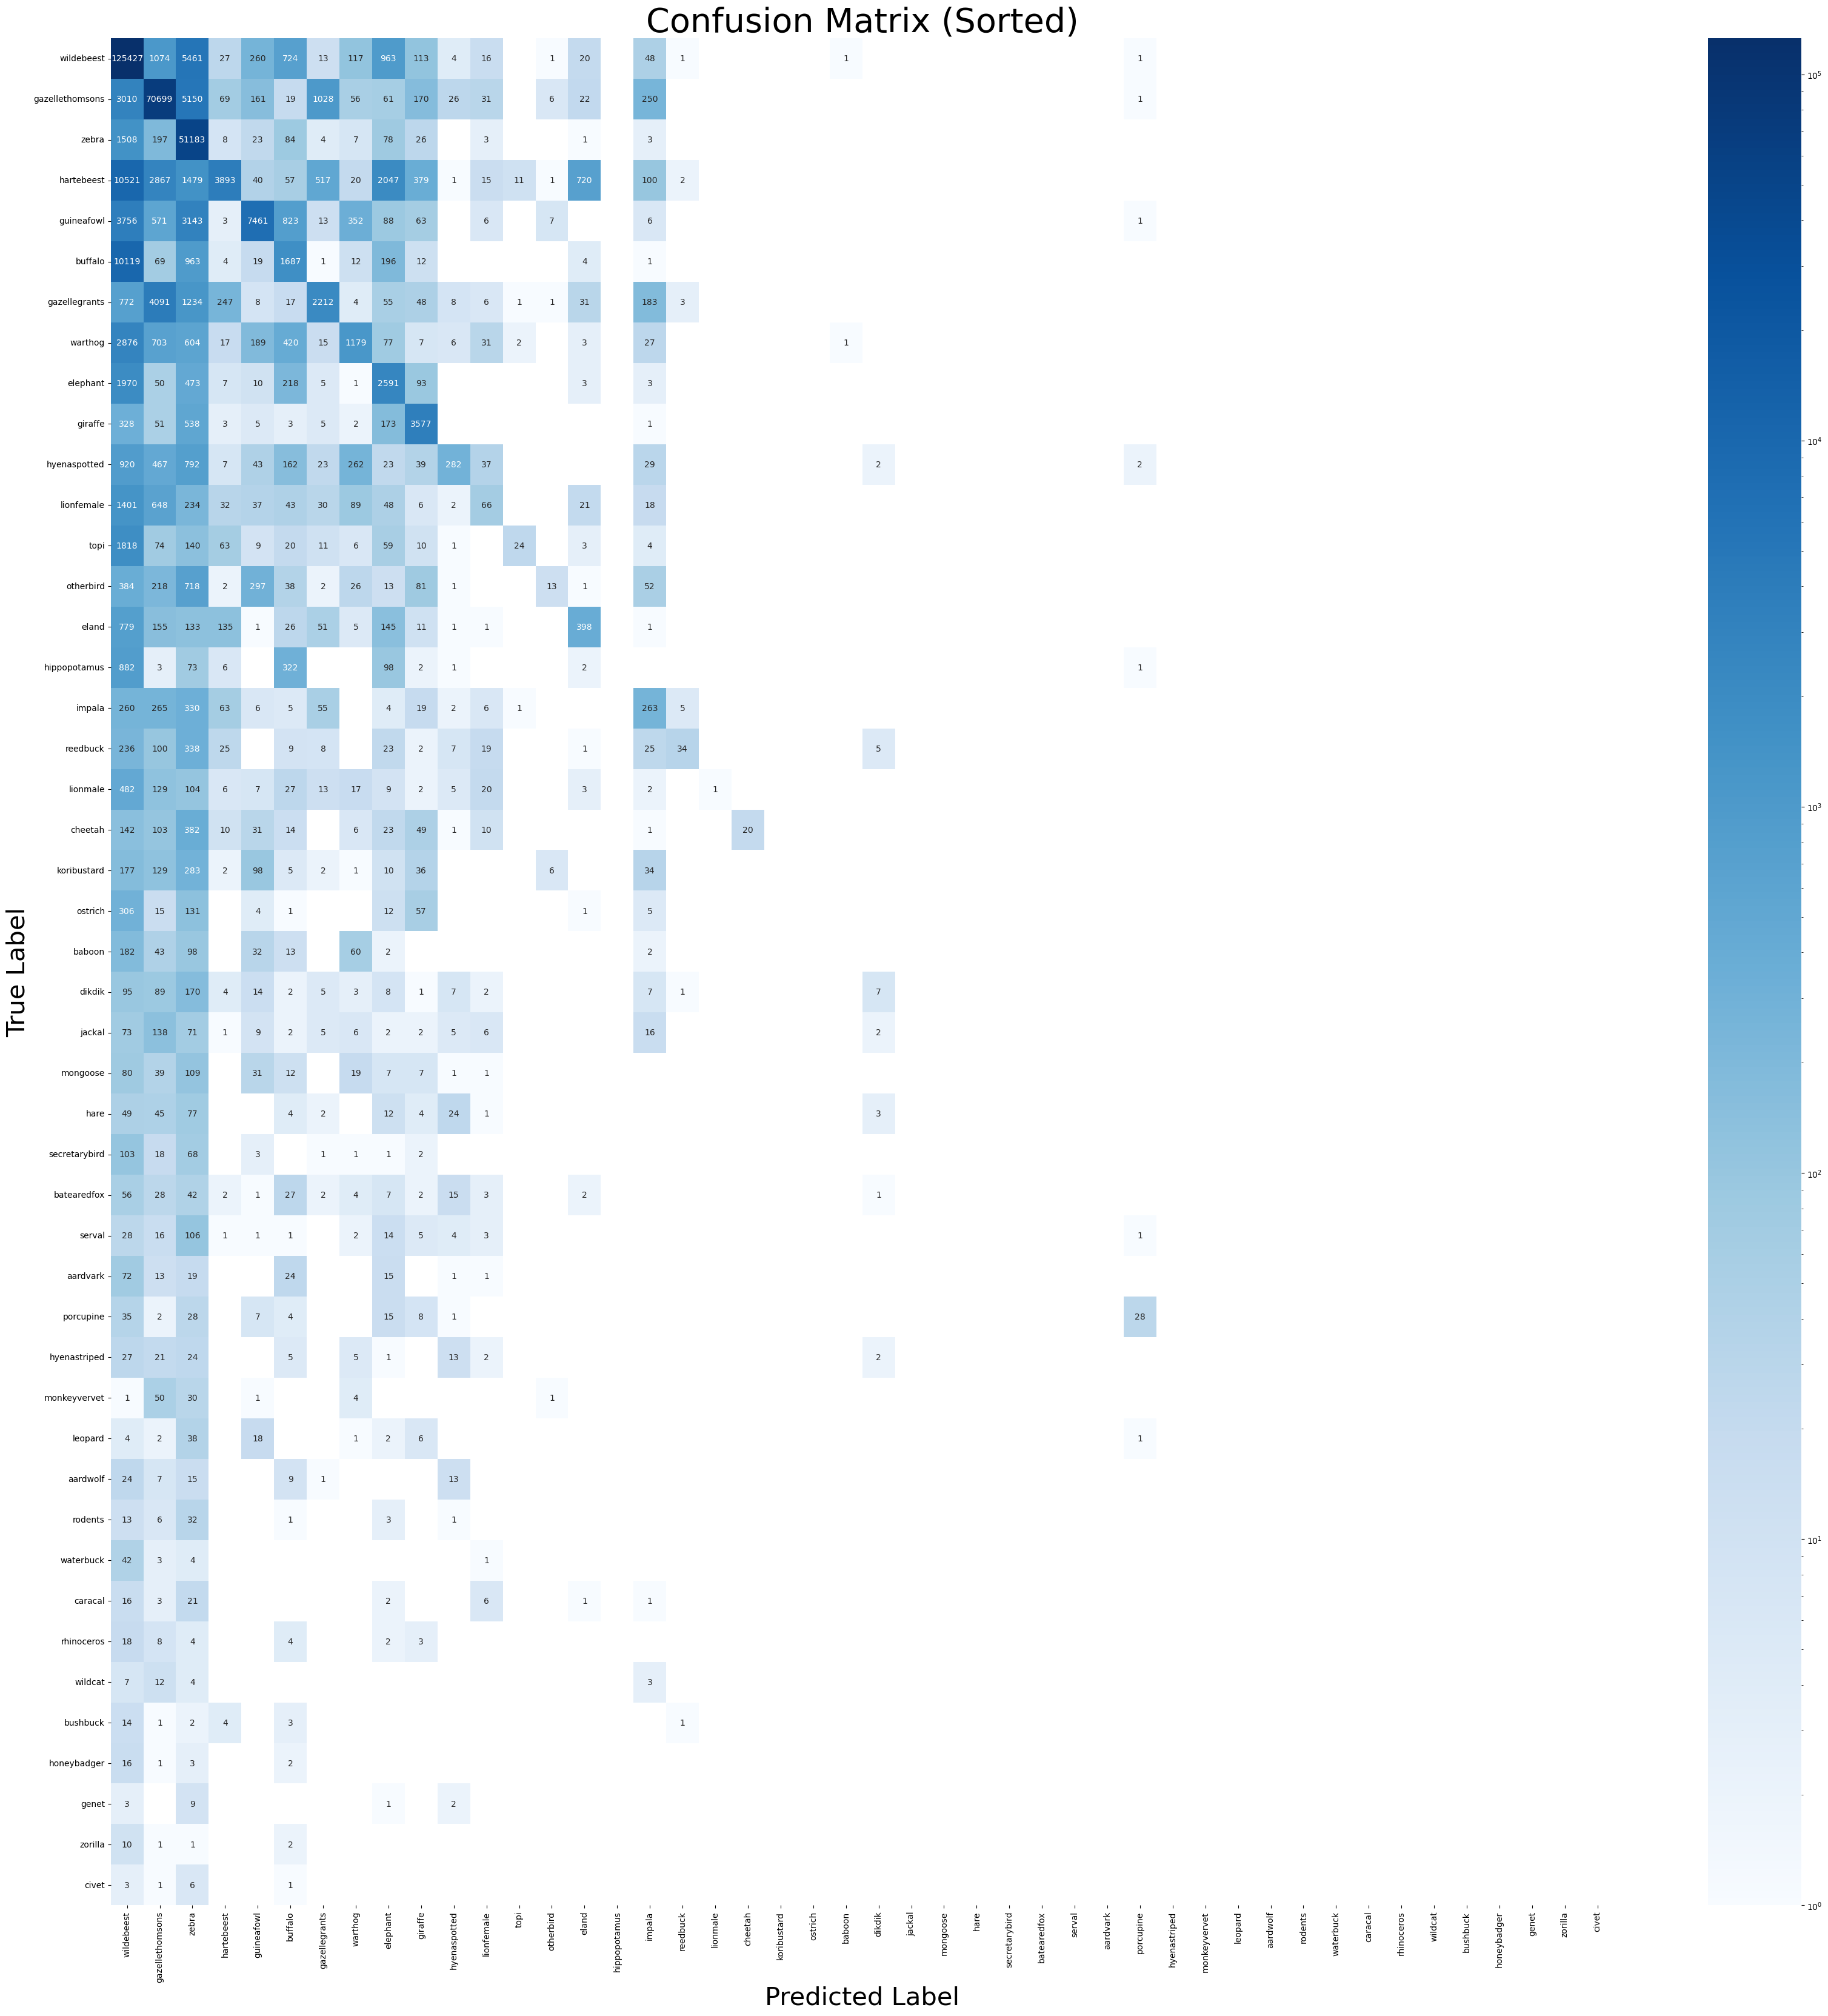

In [48]:
cm = confusion_matrix(truth_label, prediction_label)
cm_df = pd.DataFrame(cm, index=np.arange(46), columns=np.arange(46))

# Reorder the DataFrame according to the desired order
cm_sorted = cm_df.reindex(index=support_sorted_class, columns=support_sorted_class)

# Plot the sorted confusion matrix
plt.figure(figsize=(40, 40))
sns.heatmap(cm_sorted.values, annot=True, fmt='d', cmap='Blues', 
            norm=LogNorm(),xticklabels=lut.name[:46][support_sorted_class], yticklabels=lut.name[:46][support_sorted_class])
plt.xlabel('Predicted Label', fontsize=30)
plt.ylabel('True Label', fontsize=30)
plt.title('Confusion Matrix (Sorted)', fontsize=40)
plt.savefig('plots/confusion_matrix.png', bbox_inches='tight')
plt.show()

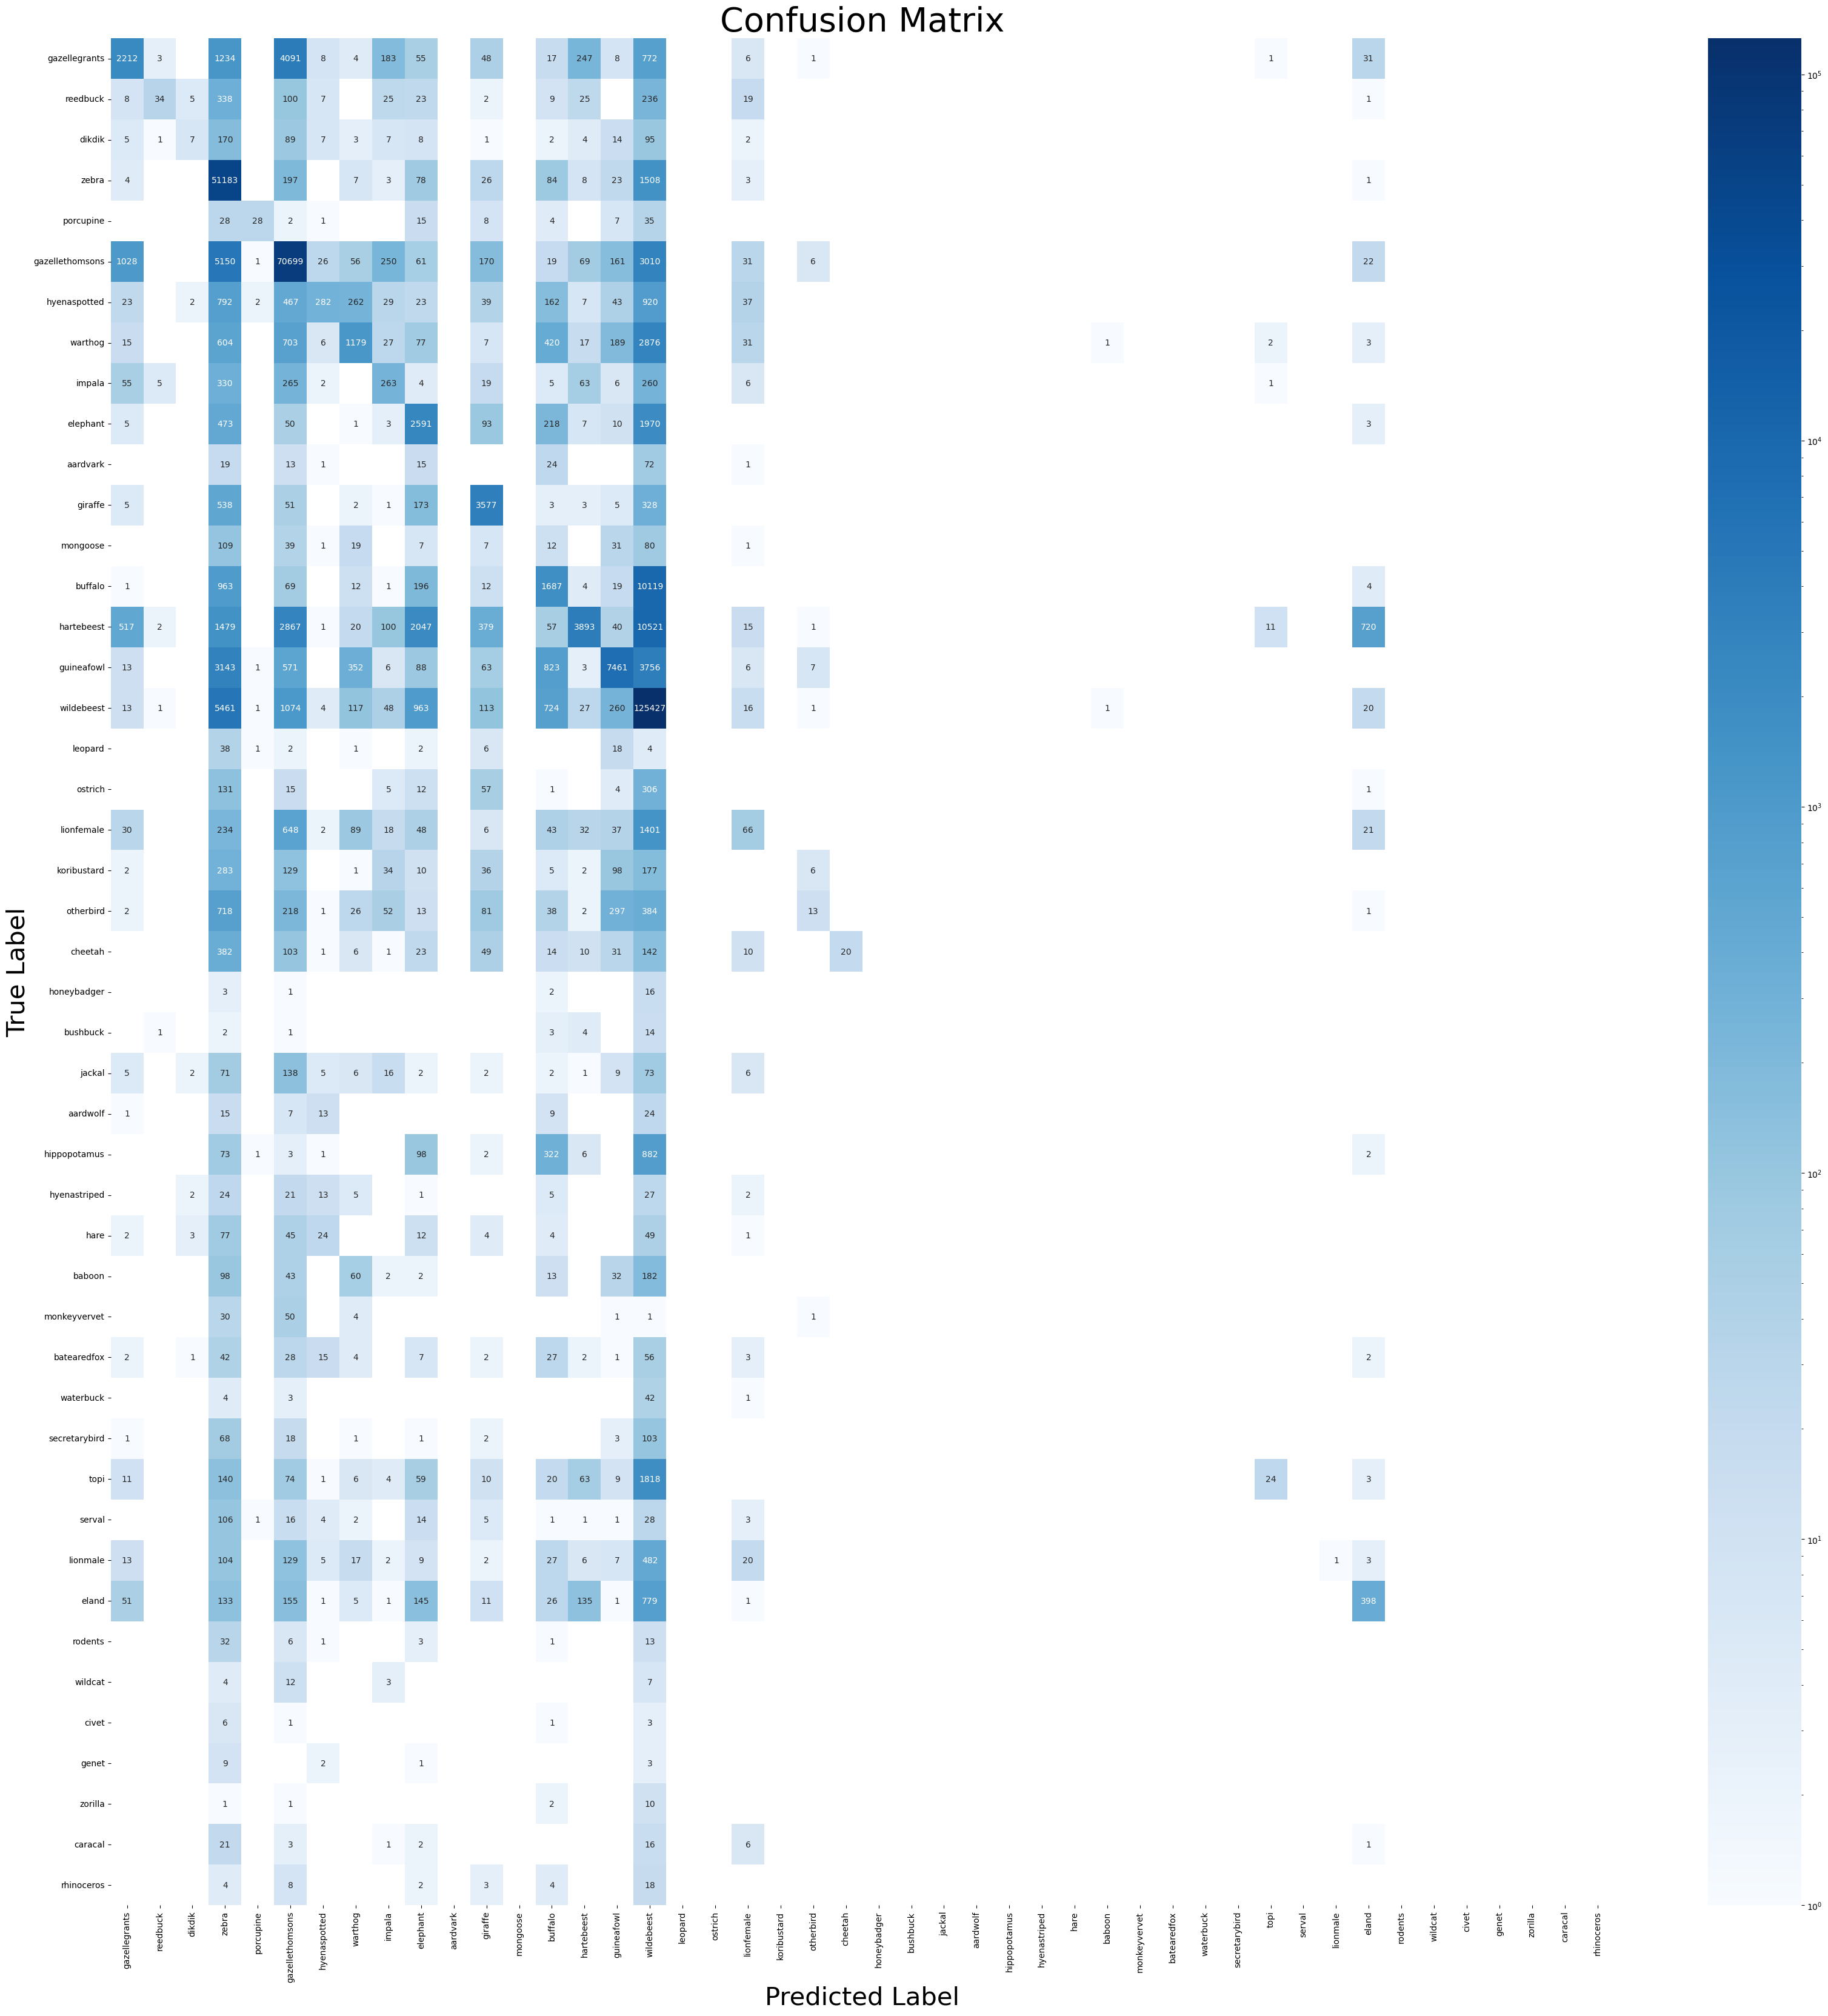

In [40]:

# cm = confusion_matrix(truth_label, prediction_label)

# Plot confusion matrix
plt.figure(figsize=(40, 40))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', xticklabels=lut.name[:46][support_sorted_class], yticklabels=lut.name[:46][support_sorted_class],norm=LogNorm())
plt.xlabel('Predicted Label',fontsize=30)
plt.ylabel('True Label',fontsize=30)
plt.title('Confusion Matrix',fontsize=40)
# plt.savefig('plots/confusion_matrix.png',bbox_inches='tight')
plt.show()

In [457]:
log_cm

array([[8.34640487, 4.21950771, 2.07944154, ..., 0.        , 0.        ,
        0.        ],
       [3.8286414 , 6.0591232 , 2.19722458, ..., 0.        , 0.        ,
        0.        ],
       [3.40119738, 4.15888308, 3.78418963, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.69314718, 2.07944154, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])